In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import warnings

init_notebook_mode(connected=True)

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data = pd.read_csv('/content/gdrive/MyDrive/US_Accidents_Dec21_updated.csv')

In [6]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
len(data)

2845342

In [8]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [10]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

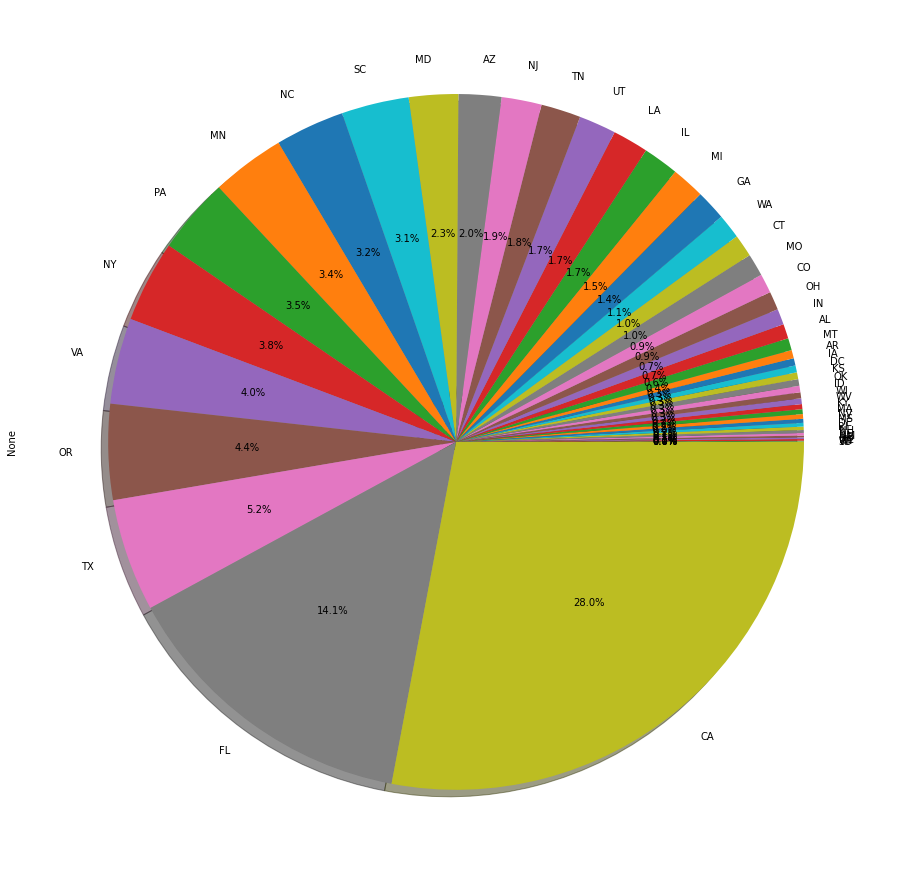

In [11]:
data.groupby(by = 'State').size().sort_values().plot.pie(autopct = '%1.1f%%',shadow = True, figsize = (16,16))

In [12]:
top_10_state = data[['City','State' , 'Severity']].groupby('State').agg({'City' : 'count' , 
                                                       'Severity' : 'mean' }).sort_values(
    by='City',ascending=False).head(10)

In [13]:
df_state_city = data[['State' , 'City','Severity']].groupby(['State' , 'City']).count().rename(columns = {'Severity' : 'Count'})

top_10_city = df_state_city.sort_values(by='Count' , ascending = False).head(10)

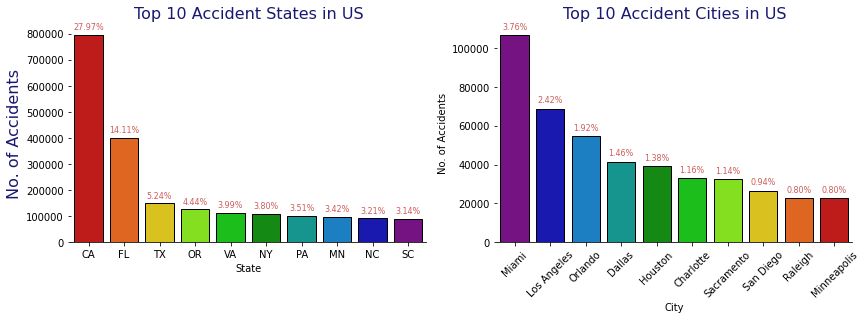

In [14]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

bar = sns.barplot(x=top_10_state.index , y=top_10_state['City'],
                  palette='nipy_spectral_r' , 
#   
                  edgecolor = 'black',
                  ax=ax1 )
sns.despine(left = True )
ax1.set_xlabel("State")
ax1.set_ylabel("No. of Accidents" , fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax1.set_title('Top 10 Accident States in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

bar = sns.barplot(x=top_10_city.index.get_level_values(1) , y=top_10_city['Count'],
                  palette='nipy_spectral' ,  
                  edgecolor = 'black',
                  ax=ax2
                 )
sns.despine(left = True )
ax2.set_xlabel("City" )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Top 10 Accident Cities in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
plt.xticks(rotation = 45)


# Working to get labels
total_accidents = len(data)

for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')

    
# for City
for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 3000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')
    
    
fig.show()

In [15]:
data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month 
data['Hour'] = data['Start_Time'].dt.hour
diff = data['End_Time'] - data['Start_Time']
data['DelayTime'] = round(diff.dt.seconds/3600,1)
year = data['Year'].value_counts()
month = data['Month'].value_counts().sort_index()
month_map = {1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun', 7:'Jul' , 8:'Aug' 
             , 9:'Sep',10:'Oct' , 11:'Nov' , 12:'Dec'}

hour_severity = data[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})

data['Day'] = data['Start_Time'].dt.dayofweek
day_severity = data[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
day_map = {0:'Monday' , 1:'Tueday' , 2:'Wedday' , 3:"Thuday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}


In [16]:
hour_severity = data[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})

data['Day'] = data['Start_Time'].dt.dayofweek
day_severity = data[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
day_map = {0:'Monday' , 1:'Tueday' , 2:'Wedday' , 3:"Thuday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}

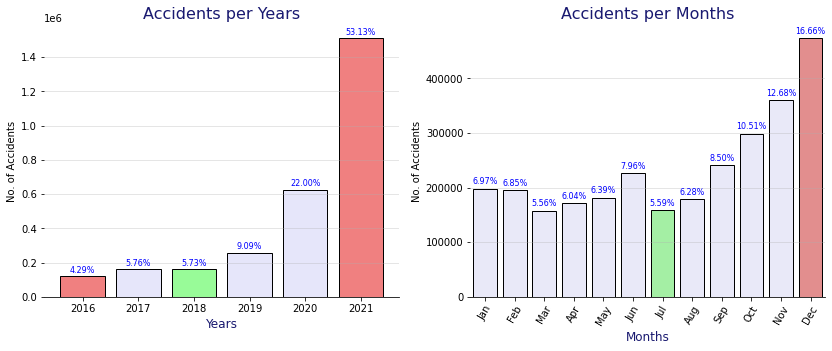

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))


# plot for year

light_palette = sns.color_palette(palette='pastel')

year_color_map = ['Lavender' for _ in range(5)]
year_color_map[0] = 'LightCoral' #light_palette[0]
year_color_map[4] = 'PaleGreen' #light_palette[2]

years = ax1.bar(year.index.values , year, color=year_color_map , edgecolor = 'black')
ax1.spines[('top')].set_visible(False)
ax1.spines[('right')].set_visible(False)
ax1.set_xlabel("Years", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax1.set_ylabel("No. of Accidents")
ax1.set_title('Accidents per Years', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='Blue')

    month_color_map = ['Lavender' for _ in range(12)]
month_color_map[11] = 'LightCoral' #light_palette[0]
month_color_map[6] = 'PaleGreen' #light_palette[2]

m = sns.barplot( x= month.index.map(month_map), y=month,  ax = ax2, palette=month_color_map , edgecolor='black' )
plt.xticks(rotation=60)
ax2.set_xlabel("Months", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents per Months', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
sns.despine(left=True)

for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 8000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='blue')

ax1.grid(axis='y', linestyle='-', alpha=0.4)    
ax2.grid(axis='y', linestyle='-', alpha=0.4) 
    
plt.show()

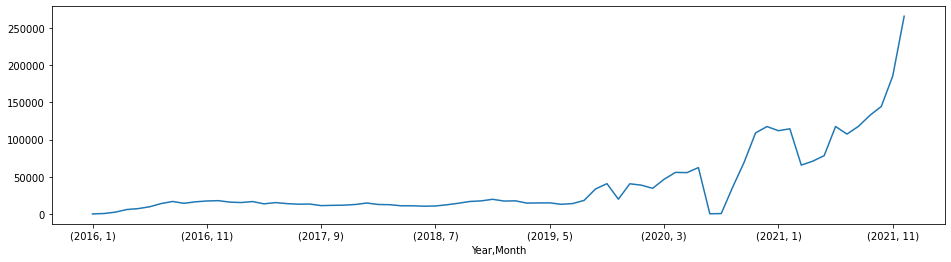

In [18]:
fig = plt.figure(figsize = (16, 4))
data.groupby(by=['Year', 'Month']).size().plot()

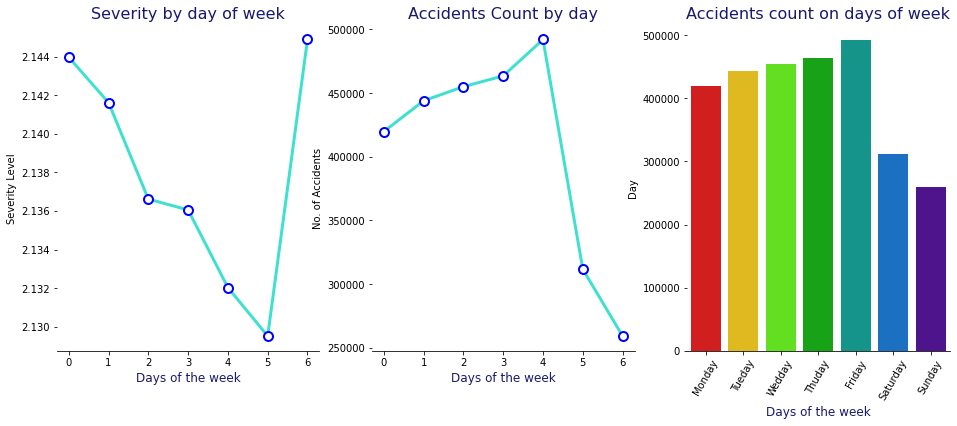

In [19]:
fig, (ax , ax2, ax3) = plt.subplots(1,3,figsize = (16,6))

sns.set_context('paper')

ax.plot(day_severity['Severity'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')


ax.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("Severity Level")
ax.set_title('Severity by day of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})


ax2.plot(day_severity['Day'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

ax2.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents Count by day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

f2 = sns.barplot(x=day_severity['Day'].index.map(day_map) , y=day_severity['Day'], ax = ax3, palette = 'nipy_spectral_r')
plt.xticks(rotation=60)
ax3.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax3.set_title('Accidents count on days of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

sns.despine(left=True)

fig.show()

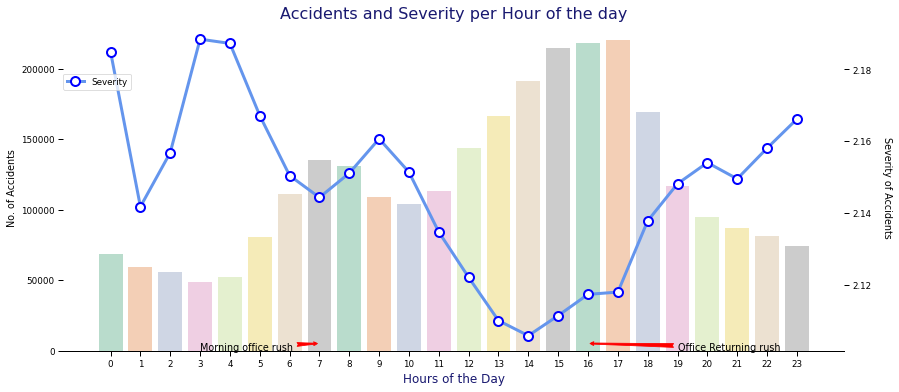

In [20]:
fig, ax = plt.subplots(1,1,figsize = (14,6))

sns.set_context('paper')

f = sns.barplot(x=hour_severity['Hour'].index , y=hour_severity['Hour'], ax = ax, palette='Pastel2')

ax2 = ax.twinx()

ax2.plot(hour_severity['Severity'] , color='CornFlowerBlue', label='Severity',linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

sns.despine(left=True)
ax2.spines[('top')].set_visible(False)
ax2.spines[('right')].set_visible(False)
ax2.spines[('left')].set_visible(False)
ax.set_xlabel("Hours of the Day", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("No. of Accidents")
ax2.set_ylabel("Severity of Accidents", rotation=270 ,labelpad=20)
ax.set_title('Accidents and Severity per Hour of the day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax2.legend(loc=(0,0.8))

ax.annotate('Morning office rush' , xytext=(3,500) , xy=(7,5000),arrowprops={'arrowstyle':'fancy' , 'color':'Red'})
ax.annotate('Office Returning rush' , xytext=(19,500),xy=(16,5000),arrowprops={'arrowstyle':'fancy', 'color':'Red'})

fig.show()

In [21]:
sev_4_mean = data[data['Severity'] == 4][['Severity','Year']].groupby('Year').count().mean()

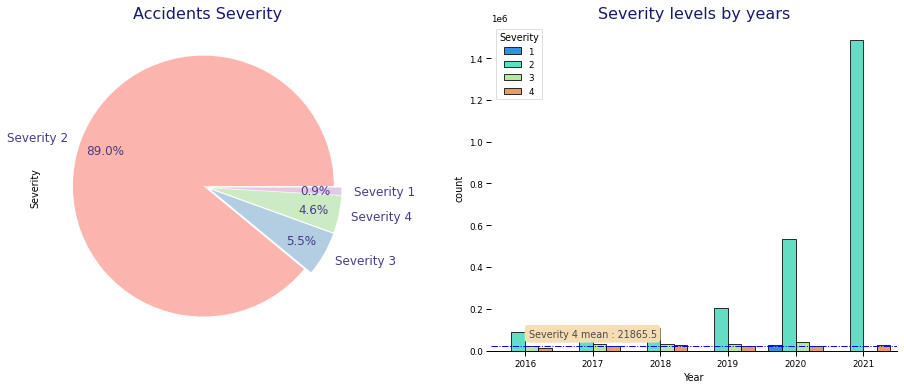

In [22]:
f , (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

data['Severity'].value_counts().plot.pie(autopct = '%1.1f%%' , ax=ax1, colors =sns.color_palette(palette='Pastel1') ,
                                      pctdistance = 0.8, explode = [.03,.03,.03,.03], 
                                       textprops = {'fontsize' : 12 , 'color' : 'DarkSlateBlue'},
                                       labels=['Severity 2','Severity 3' , 'Severity 4' , 'Severity 1']
                              )

ax1.set_title("Accidents Severity", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )


s = sns.countplot(data=data[['Severity','Year']] , x = 'Year' , hue='Severity' , ax=ax2, palette = 'rainbow' 
                  , edgecolor='black')
ax2.axhline(sev_4_mean[0] ,color='Blue', linewidth=1, linestyle='dashdot')
ax2.annotate(f"Severity 4 mean : {sev_4_mean[0]}",
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='Wheat', linewidth=0),
            xy=(1,80000))

ax2.set_title("Severity levels by years", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )

sns.despine(left=True)


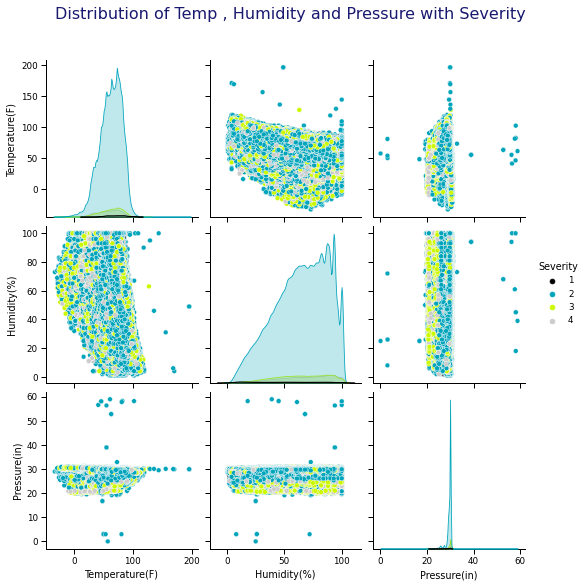

In [22]:
pair = sns.pairplot(data[['Severity','Temperature(F)','Humidity(%)','Pressure(in)']].dropna(), hue='Severity', palette='nipy_spectral')
# pair = sns.pairplot(df[['Severity','Temperature(F)']].dropna(), hue='Severity', palette='nipy_spectral')

pair.fig.suptitle('Distribution of Temp , Humidity and Pressure with Severity', y =1.08 
                  , fontsize = 16 , color = 'MidnightBlue' , ha = 'center' , va='top')

plt.show()

In [23]:
data['Severity'] = data['Severity'].astype('int')

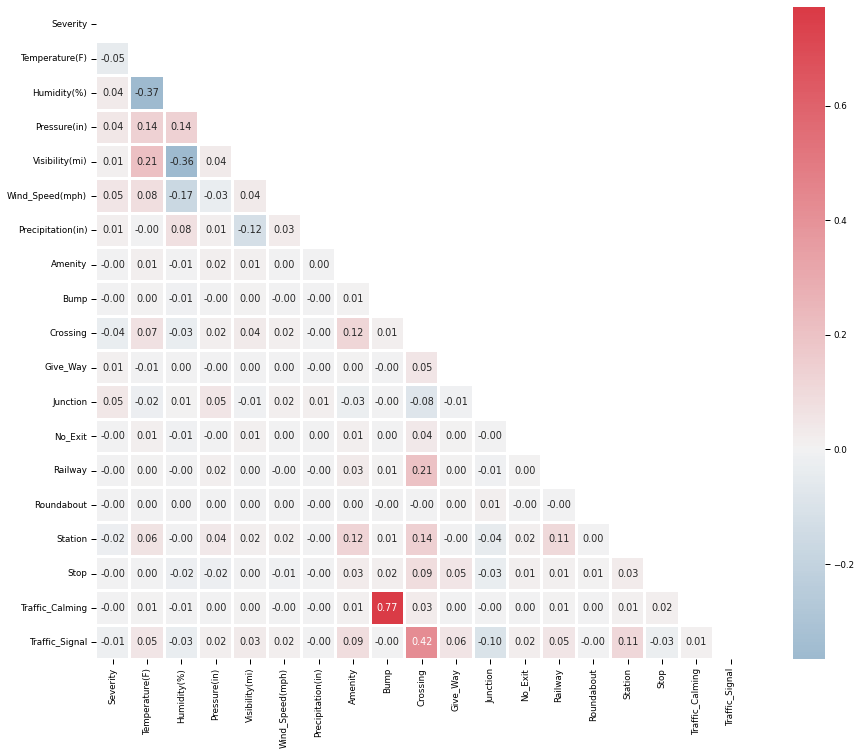

In [24]:
features = ['Severity','Temperature(F)', 'Humidity(%)', 
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 
       'Sunrise_Sunset']

mask = np.zeros_like(data[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(16,12))
sns.heatmap(data[features].corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, 
            annot=True, fmt='.2f', center=0, linewidth=2, cbar=True , mask = mask)


plt.show()

(24.566027, 49.00058)

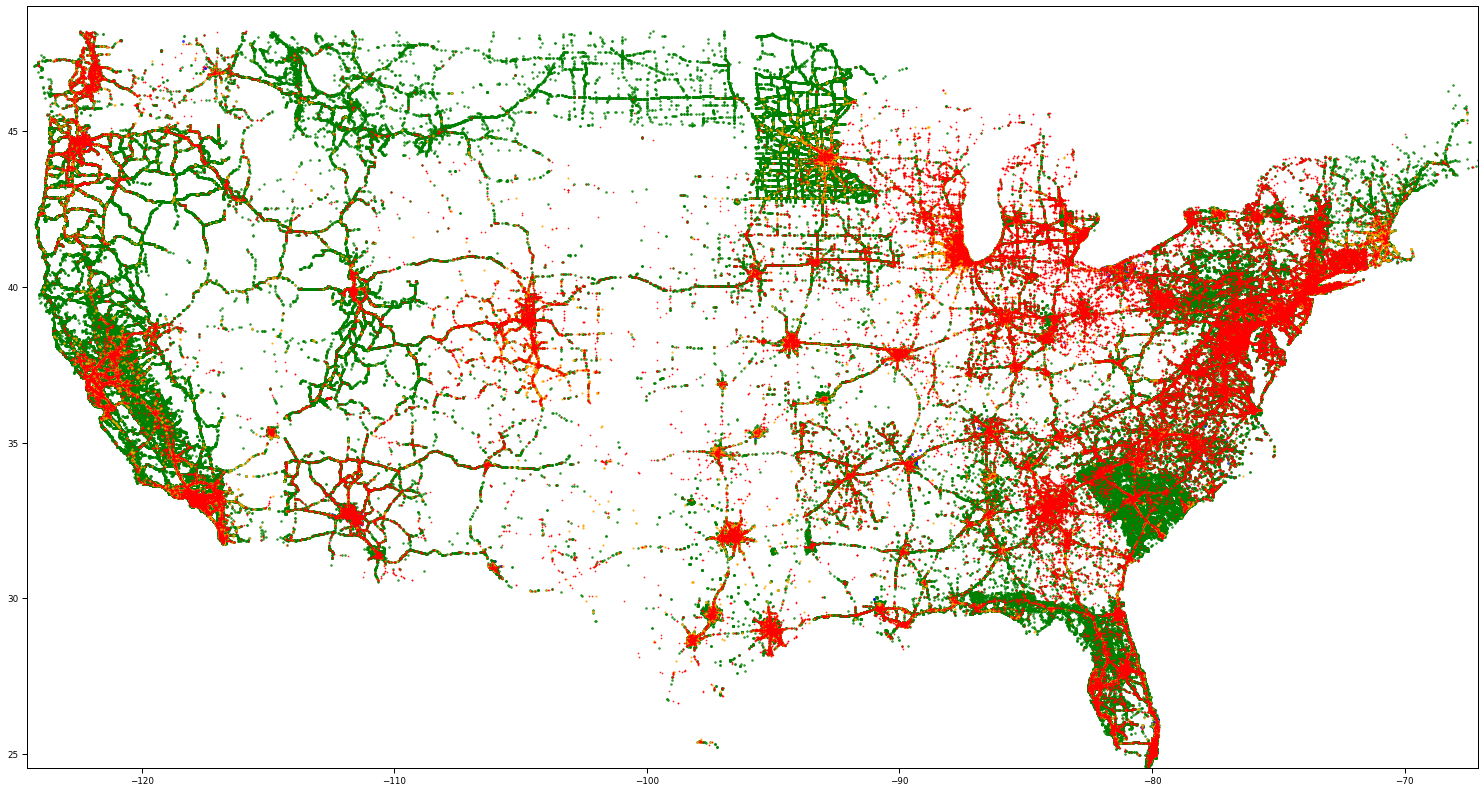

In [25]:
BBox = ((data.Start_Lng.min(), data.Start_Lng.max(), data.Start_Lat.min(), data.Start_Lat.max()))
# map_pic = plt.imread('map1.png')


fig, ax = plt.subplots(figsize = (26,14))
ax.scatter(data[data['Severity']==1].Start_Lng+0.3, data[data['Severity']==1].Start_Lat-0.8, zorder=1, alpha= 0.7, c='blue', s=4)
ax.scatter(data[data['Severity']==2].Start_Lng+0.3, data[data['Severity']==2].Start_Lat-0.8, zorder=1, alpha= 0.7, c='green', s=3)
ax.scatter(data[data['Severity']==3].Start_Lng+0.3, data[data['Severity']==3].Start_Lat-0.8, zorder=1, alpha= 0.7, c='orange', s=2)
ax.scatter(data[data['Severity']==4].Start_Lng+0.3, data[data['Severity']==4].Start_Lat-0.8, zorder=1, alpha= 0.7, c='red', s=1)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(map_pic, zorder=0, extent = BBox, aspect= 'auto', interpolation='none')
# ax.imshow(map_pic, zorder=2, alpha= 0.5, extent = BBox, aspect= 'auto')

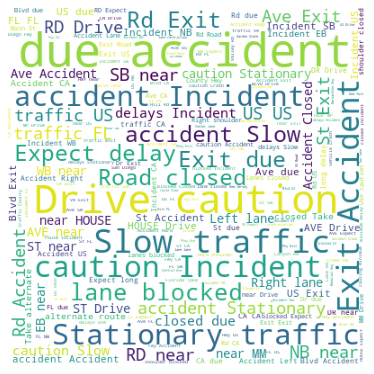

In [26]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(data['Description'].to_list())
wordcloud = WordCloud(width = 400, height = 400, background_color = 'white', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

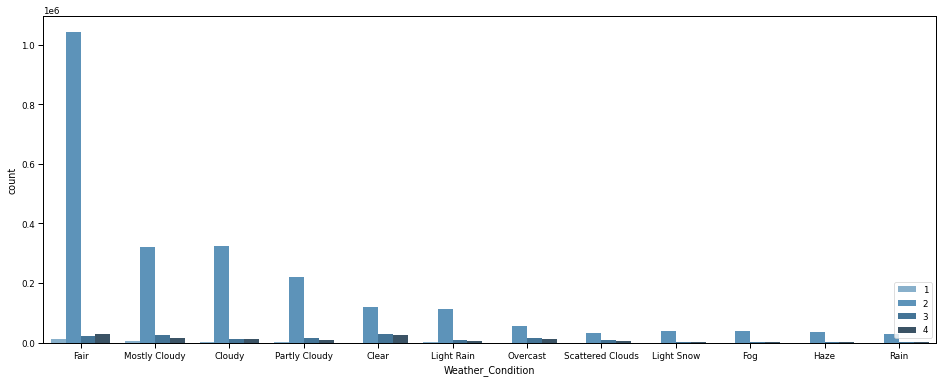

In [26]:
fig = plt.figure(figsize = (16, 6))
sns.countplot(x="Weather_Condition", data=data, order=data['Weather_Condition'].value_counts()[:12].index, hue='Severity', palette='Blues_d')
plt.legend(loc='lower right')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [29]:
data.isna().mean()

ID                       0.000000e+00
Severity                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Start_Lng                0.000000e+00
End_Lat                  0.000000e+00
End_Lng                  0.000000e+00
Distance(mi)             0.000000e+00
Description              0.000000e+00
Number                   6.129003e-01
Street                   7.029032e-07
Side                     0.000000e+00
City                     4.814887e-05
County                   0.000000e+00
State                    0.000000e+00
Zipcode                  4.635647e-04
Country                  0.000000e+00
Timezone                 1.285961e-03
Airport_Code             3.356011e-03
Weather_Timestamp        1.783125e-02
Temperature(F)           2.434646e-02
Wind_Chill(F)            1.650568e-01
Humidity(%)              2.568830e-02
Pressure(in)             2.080593e-02
Visibility(mi)           2.479350e-02
Wind_Directi

In [30]:
null_columns = ['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)']

data.drop(null_columns, axis=1, inplace = True)

In [31]:
data.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        2
Side                          0
City                        137
County                        0
State                         0
Zipcode                    1319
Country                       0
Timezone                   3659
Airport_Code               9549
Weather_Timestamp         50736
Temperature(F)            69274
Humidity(%)               73092
Pressure(in)              59200
Visibility(mi)            70546
Wind_Direction            73775
Wind_Speed(mph)          157944
Weather_Condition         70636
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [32]:
data.dropna(axis=0, inplace = True)

In [33]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Hour,DelayTime,Day
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,...,False,Night,Night,Night,Night,2016,2,0,6.0,0
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,...,False,Day,Day,Day,Day,2016,2,7,6.0,0
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,1.427,At Dela Palma Rd - Accident.,State Route 32,R,...,False,Day,Day,Day,Day,2016,2,8,6.0,0
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,0.227,At OH-4/Exit 54 - Accident.,I-75 S,R,...,False,Day,Day,Day,Day,2016,2,8,6.0,0
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,0.521,At Bagley Rd/Exit 235 - Accident.,I-71 S,R,...,False,Day,Day,Day,Day,2016,2,11,6.0,0


In [34]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [35]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'Airport_Code': 1947,
 'Astronomical_Twilight': 2,
 'City': 10788,
 'Civil_Twilight': 2,
 'Country': 1,
 'County': 1668,
 'Description': 1115045,
 'ID': 2655883,
 'Nautical_Twilight': 2,
 'Side': 2,
 'State': 49,
 'Street': 154064,
 'Sunrise_Sunset': 2,
 'Timezone': 4,
 'Weather_Condition': 123,
 'Weather_Timestamp': 444273,
 'Wind_Direction': 23,
 'Zipcode': 347059}

In [36]:
unneeded_columns = ['ID', 'Description', 'Street', 'City', 'Zipcode', 'Country']
data.columns.to_list()
data.drop(unneeded_columns, axis=1, inplace = True)

In [37]:
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])
data.columns.to_list()


['Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Side',
 'County',
 'State',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Year',
 'Month',
 'Hour',
 'DelayTime',
 'Day']

In [38]:
import datetime
date= data['Start_Time']
print(len(date))
months_list=[]
for i in range(len(date)):
#     h=data.iloc[i]
#     h=h['Start_Time']
#     str_h= str(h)
#     #print(h)
#     h= datetime.datetime.strptime(str_h, "%Y-%m-%d %H:%M:%S")
#     months_=h.month
    #print(months_)
    #print(h)
    months=data.iloc[i]
    months=months['Start_Time'].month
    months_list.append(months)
data['Start_Time_Month']=months_list
print(data['Start_Time_Month'])
    #print(months)

2655883
0          2
4          2
5          2
6          2
7          2
          ..
2845337    8
2845338    8
2845339    8
2845340    8
2845341    8
Name: Start_Time_Month, Length: 2655883, dtype: int64


In [39]:
date= data['Start_Time']
print(len(date))
years_list=[]
for i in range(len(data)):
    years=data.iloc[i]
    years=years['Start_Time'].year
    years_list.append(years)
data['Start_Time_Year']=years_list
print(data['Start_Time_Year'])

2655883
0          2016
4          2016
5          2016
6          2016
7          2016
           ... 
2845337    2019
2845338    2019
2845339    2019
2845340    2019
2845341    2019
Name: Start_Time_Year, Length: 2655883, dtype: int64


In [40]:
date= data['End_Time']
print(len(date))
months_list=[]
for i in range(len(data)):
    months=data.iloc[i]
    months=months['End_Time'].month
    months_list.append(months)
data['End_Time_Month']=months_list

2655883


In [41]:
date= data['End_Time']
print(len(date))
years_list=[]
for i in range(len(data)):
    years=data.iloc[i]
    years=years['End_Time'].year
    years_list.append(years)
data['End_Time_Year']=years_list

2655883


In [42]:
data = data.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

In [43]:
data

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,County,State,Timezone,Airport_Code,Temperature(F),...,Astronomical_Twilight,Year,Month,Hour,DelayTime,Day,Start_Time_Month,Start_Time_Year,End_Time_Month,End_Time_Year
0,3,40.108910,-83.092860,3.230,R,Franklin,OH,US/Eastern,KOSU,42.1,...,Night,2016,2,0,6.0,0,2,2016,2,2016
4,3,39.172393,-84.492792,0.500,R,Hamilton,OH,US/Eastern,KLUK,37.0,...,Day,2016,2,7,6.0,0,2,2016,2,2016
5,2,39.063240,-84.032430,1.427,R,Clermont,OH,US/Eastern,KI69,35.6,...,Day,2016,2,8,6.0,0,2,2016,2,2016
6,2,39.775650,-84.186030,0.227,R,Montgomery,OH,US/Eastern,KFFO,33.8,...,Day,2016,2,8,6.0,0,2,2016,2,2016
7,2,41.375310,-81.820170,0.521,R,Cuyahoga,OH,US/Eastern,KCLE,33.1,...,Day,2016,2,11,6.0,0,2,2016,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,0.543,R,Riverside,CA,US/Pacific,KRAL,86.0,...,Day,2019,8,18,0.5,4,8,2019,8,2019
2845338,2,32.766960,-117.148060,0.338,R,San Diego,CA,US/Pacific,KMYF,70.0,...,Day,2019,8,19,0.4,4,8,2019,8,2019
2845339,2,33.775450,-117.847790,0.561,R,Orange,CA,US/Pacific,KSNA,73.0,...,Day,2019,8,19,0.5,4,8,2019,8,2019
2845340,2,33.992460,-118.403020,0.772,R,Los Angeles,CA,US/Pacific,KSMO,71.0,...,Day,2019,8,19,0.5,4,8,2019,8,2019


In [44]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [47]:
columns= ['Side', 'County', 'State', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition']

In [48]:
for i in columns:
    le.fit(data[i])
    data[i] = le.transform(data[i])
    

In [49]:
def get_binary_column(df, column):
        return data[column].apply(lambda x: 1 if x == 'Day' else 0)

In [50]:
data['Sunrise_Sunset'] = get_binary_column(data, 'Sunrise_Sunset')
data['Civil_Twilight'] = get_binary_column(data, 'Civil_Twilight')
data['Nautical_Twilight'] = get_binary_column(data, 'Nautical_Twilight')
data['Astronomical_Twilight'] = get_binary_column(data, 'Astronomical_Twilight')

In [51]:
data.isnull().sum()

Severity                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Side                     0
County                   0
State                    0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Year                     0
Month                    0
Hour                     0
DelayTime                0
D

In [52]:
data_y = data['Severity']
data_X = data.drop('Severity', axis=1)
#data_X = X.astype(np.float)

In [53]:
data_X

,Start_Lat,Start_Lng,Distance(mi),Side,County,State,Timezone,Airport_Code,Temperature(F),Humidity(%),...,Astronomical_Twilight,Year,Month,Hour,DelayTime,Day,Start_Time_Month,Start_Time_Year,End_Time_Month,End_Time_Year
0,40.108910,-83.092860,3.230,1,536,33,1,1416,42.1,58.0,...,0,2016,2,0,6.0,0,2,2016,2,2016
4,39.172393,-84.492792,0.500,1,640,33,1,1119,37.0,93.0,...,1,2016,2,7,6.0,0,2,2016,2,2016
5,39.063240,-84.032430,1.427,1,317,33,1,933,35.6,100.0,...,1,2016,2,8,6.0,0,2,2016,2,2016
6,39.775650,-84.186030,0.227,1,1009,33,1,680,33.8,100.0,...,1,2016,2,8,6.0,0,2,2016,2,2016
7,41.375310,-81.820170,0.521,1,389,33,1,397,33.1,92.0,...,1,2016,2,11,6.0,0,2,2016,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,34.002480,-117.379360,0.543,1,1265,3,3,1544,86.0,40.0,...,1,2019,8,18,0.5,4,8,2019,8,2019
2845338,32.766960,-117.148060,0.338,1,1317,3,3,1296,70.0,73.0,...,1,2019,8,19,0.4,4,8,2019,8,2019
2845339,33.775450,-117.847790,0.561,1,1104,3,3,1709,73.0,64.0,...,1,2019,8,19,0.5,4,8,2019,8,2019
2845340,33.992460,-118.403020,0.772,1,875,3,3,1704,71.0,81.0,...,1,2019,8,19,0.5,4,8,2019,8,2019


In [54]:
scaler = StandardScaler()

data_X = scaler.fit_transform(data_X)

In [55]:
import sklearn

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.75, random_state=100)

In [57]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

In [64]:
import pickle

# **Logistic Regression**

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
logistic_model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [127]:
y_pred_logistic= logistic_model.predict(X_test)

In [128]:
accuracy = accuracy_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic, average="weighted")
precision = precision_score(y_test, y_pred_logistic, average="weighted")
cf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Results of Logistic Regression")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix   : ")
print(cf_matrix)

Results of Logistic Regression
Accuracy    :  0.8946384706560979
Recall      :  0.8946384706560979
Precision   :  0.8539889299254698
Confusion Matrix   : 
[[   325   6071      0      3]
 [   267 589469   5089    889]
 [    57  30526   3013    309]
 [    39  25701   1006   1207]]


In [65]:
pickle.dump(logistic_model,open('logistic_regression_model_final.pkl','wb'))

# **Decision Tree**

In [66]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
y_pred_dt= decision_tree_model.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt, average="weighted")
precision = precision_score(y_test, y_pred_dt, average="weighted")
cf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Results of Decision Tree")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix   : ")
print(cf_matrix)

Results of Decision Tree
Accuracy    :  0.9040967150673749
Recall      :  0.9040967150673749
Precision   :  0.9061424711701926
Confusion Matrix   : 
[[  4309   1440    484    166]
 [  1456 566478  14603  13177]
 [   455  13523  16628   3299]
 [   170  11576   3328  12879]]


In [69]:
pickle.dump(decision_tree_model,open('decision_tree_model_final.pkl','wb'))

In [135]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_m = DecisionTreeClassifier(max_depth=4,random_state=42)
decision_tree_m.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

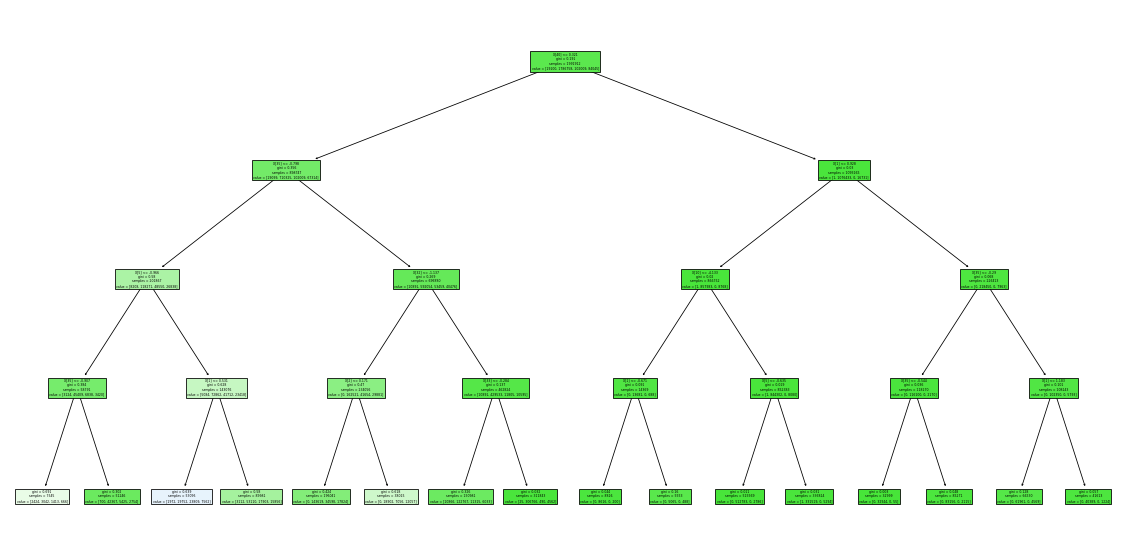

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(decision_tree_m, filled=True)
plt.savefig('decision_tree for the dataset')
plt.show()

# **Neural Network**

In [71]:
y_train1 = y_train -1
y_test1 = y_test - 1

In [75]:
from keras.models import Sequential,Input,Model
inputs = tf.keras.Input(shape=(data_X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 20

history = model.fit(
    X_train,
    y_train1,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
        )
    

Epoch 1/20
49798/49798 [==============================] - 131s 3ms/step - loss: 0.2493 - accuracy: 0.9109 - val_loss: 0.2342 - val_accuracy: 0.9156
Epoch 2/20
49798/49798 [==============================] - 174s 3ms/step - loss: 0.2312 - accuracy: 0.9164 - val_loss: 0.2285 - val_accuracy: 0.9176
Epoch 3/20
49798/49798 [==============================] - 165s 3ms/step - loss: 0.2266 - accuracy: 0.9180 - val_loss: 0.2258 - val_accuracy: 0.9184
Epoch 4/20
49798/49798 [==============================] - 155s 3ms/step - loss: 0.2241 - accuracy: 0.9188 - val_loss: 0.2236 - val_accuracy: 0.9195
Epoch 5/20
49798/49798 [==============================] - 130s 3ms/step - loss: 0.2224 - accuracy: 0.9193 - val_loss: 0.2242 - val_accuracy: 0.9190
Epoch 6/20
49798/49798 [==============================] - 112s 2ms/step - loss: 0.2215 - accuracy: 0.9198 - val_loss: 0.2226 - val_accuracy: 0.9190
Epoch 7/20
49798/49798 [==============================] - 104s 2ms/step - loss: 0.2206 - accuracy: 0.9199 - val_

In [77]:
model.evaluate(X_test,y_test1)

20750/20750 [==============================] - 54s 3ms/step - loss: 0.2205 - accuracy: 0.9204


[0.22045966982841492, 0.9203564524650574]

In [81]:
y_pred_nn= model.predict(X_test)

In [89]:
y_pred_label_nn=[]
# y_pred[0][0]
for i in range(0,len(y_test1)):
  max=-1
  if(y_pred_nn[i][0]>max):
    max=y_pred_nn[i][0]
  if(y_pred_nn[i][1]>max):
    max=y_pred_nn[i][1]
  if(y_pred_nn[i][2]>max):
    max=y_pred_nn[i][2]
  if(y_pred_nn[i][3]>max):
    max=y_pred_nn[i][3]
  if(max==y_pred_nn[i][0]):
    y_pred_label_nn.append(1)
  elif(max==y_pred_nn[i][1]):
    y_pred_label_nn.append(2)
  elif(max==y_pred_nn[i][2]):
    y_pred_label_nn.append(3)
  elif(max==y_pred_nn[i][3]):
    y_pred_label_nn.append(4)


In [90]:
accuracy = accuracy_score(y_test, y_pred_label_nn)
recall = recall_score(y_test, y_pred_label_nn, average="weighted")
precision = precision_score(y_test, y_pred_label_nn, average="weighted")
cf_matrix = confusion_matrix(y_test, y_pred_label_nn)
print("Results of Neural Network")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix   : ")
print(cf_matrix)

Results of Neural Network
Accuracy    :  0.9203564613514746
Recall      :  0.9203564613514746
Precision   :  0.9060166938882748
Confusion Matrix   : 
[[  3384   2676    281     58]
 [   663 588052   3414   3585]
 [   349  20712  10608   2236]
 [   219  17026   1662   9046]]


In [122]:
pickle.dump(model,open('Neural_network_model_final.pkl','wb'))

INFO:tensorflow:Assets written to: ram://80b268fe-5f8b-4a7f-8b46-c9a8dfce3f16/assets


# **Random Forest**

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [92]:
rf.fit(X_train, y_train);

In [93]:
y_pred_rf= rf.predict(X_test)

In [115]:
y_pred_int_rf = y_pred_rf.astype(int)


In [120]:
accuracy = accuracy_score(y_test, y_pred_int_rf)
recall = recall_score(y_test, y_pred_int_rf, average="weighted")
precision = precision_score(y_test, y_pred_int_rf, average="weighted")
cf_matrix = confusion_matrix(y_test, y_pred_int_rf)
print("Results of Random Forest")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix   : ")
print(cf_matrix)

Results of Random Forest
Accuracy    :  0.9039777339672967
Recall      :  0.9039777339672967
Precision   :  0.901722354710279
Confusion Matrix   : 
[[  5275   1066     57      1]
 [  4118 583827   7651    118]
 [   524  24230   9111     40]
 [   142  13008  12801   2002]]


In [129]:
pickle.dump(rf,open('random_forest_model_final.pkl','wb'))